## Ch `07`: Concept `03`

## Denoising autoencoder

A denoising autoencoder is pretty much the same architecture as a normal autoencoder. The input is noised up, and cost function tries to denoise it by minimizing the construction error from denoised input to clean output.

In [1]:
# https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
import sys
sys.path.insert(0,'/media/damianos/New Volume/Desktop/Projects/Machine Learning with Tensorflow/TensorFlow-Book/ch07_autoencoder')
import os
os.chdir('/media/damianos/New Volume/Desktop/Projects/Machine Learning with Tensorflow/TensorFlow-Book/ch07_autoencoder')
import _pickle as cPickle
import numpy as np
from autoencoder_noise_DC import Autoencoder

def grayscale(a):
    return a.reshape(a.shape[0], 3, 32, 32).mean(1).reshape(a.shape[0], -1)

def unpickle(file):
    fo = open(file, 'rb')
    dict = cPickle.load(fo, encoding='latin1')
    fo.close()
    return dict

names = unpickle('./cifar-10-batches-py/batches.meta')['label_names']
data, labels = [], []
for i in range(1, 6):
    filename = './cifar-10-batches-py/data_batch_' + str(i)
    batch_data = unpickle(filename)
    if len(data) > 0:
        data = np.vstack((data, batch_data['data']))
        labels = np.hstack((labels, batch_data['labels']))
    else:
        data = batch_data['data']
        labels = batch_data['labels']

data = grayscale(data)

x = np.matrix(data)
y = np.array(labels)

horse_indices = np.where(y == 7)[0]

horse_x = x[horse_indices]

print(np.shape(horse_x))  

input_dim = np.shape(horse_x)[1]
hidden_dim = 100
ae = Autoencoder(input_dim, hidden_dim, epoch=1000, batch_size=1000, learning_rate=0.001)
ae.train(horse_x)

test_data = unpickle('./cifar-10-batches-py/test_batch')
test_x = grayscale(test_data['data'])
test_labels = np.array(test_data['labels'])
encoding = ae.encode(test_x)
encoding = np.array(encoding)
test_horse_indices = np.where(test_labels == 7)[0]

(5000, 1024)
epoch 0: loss = 135.271484375
epoch 100: loss = 106.11238098144531
epoch 200: loss = 71.41329956054688
epoch 300: loss = 60.16147232055664
epoch 400: loss = 59.46696090698242
epoch 500: loss = 58.44416046142578
epoch 600: loss = 58.50923156738281
epoch 700: loss = 59.10980224609375
epoch 800: loss = 57.709556579589844
epoch 900: loss = 58.4933967590332
INFO:tensorflow:Restoring parameters from ./model.ckpt


INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt


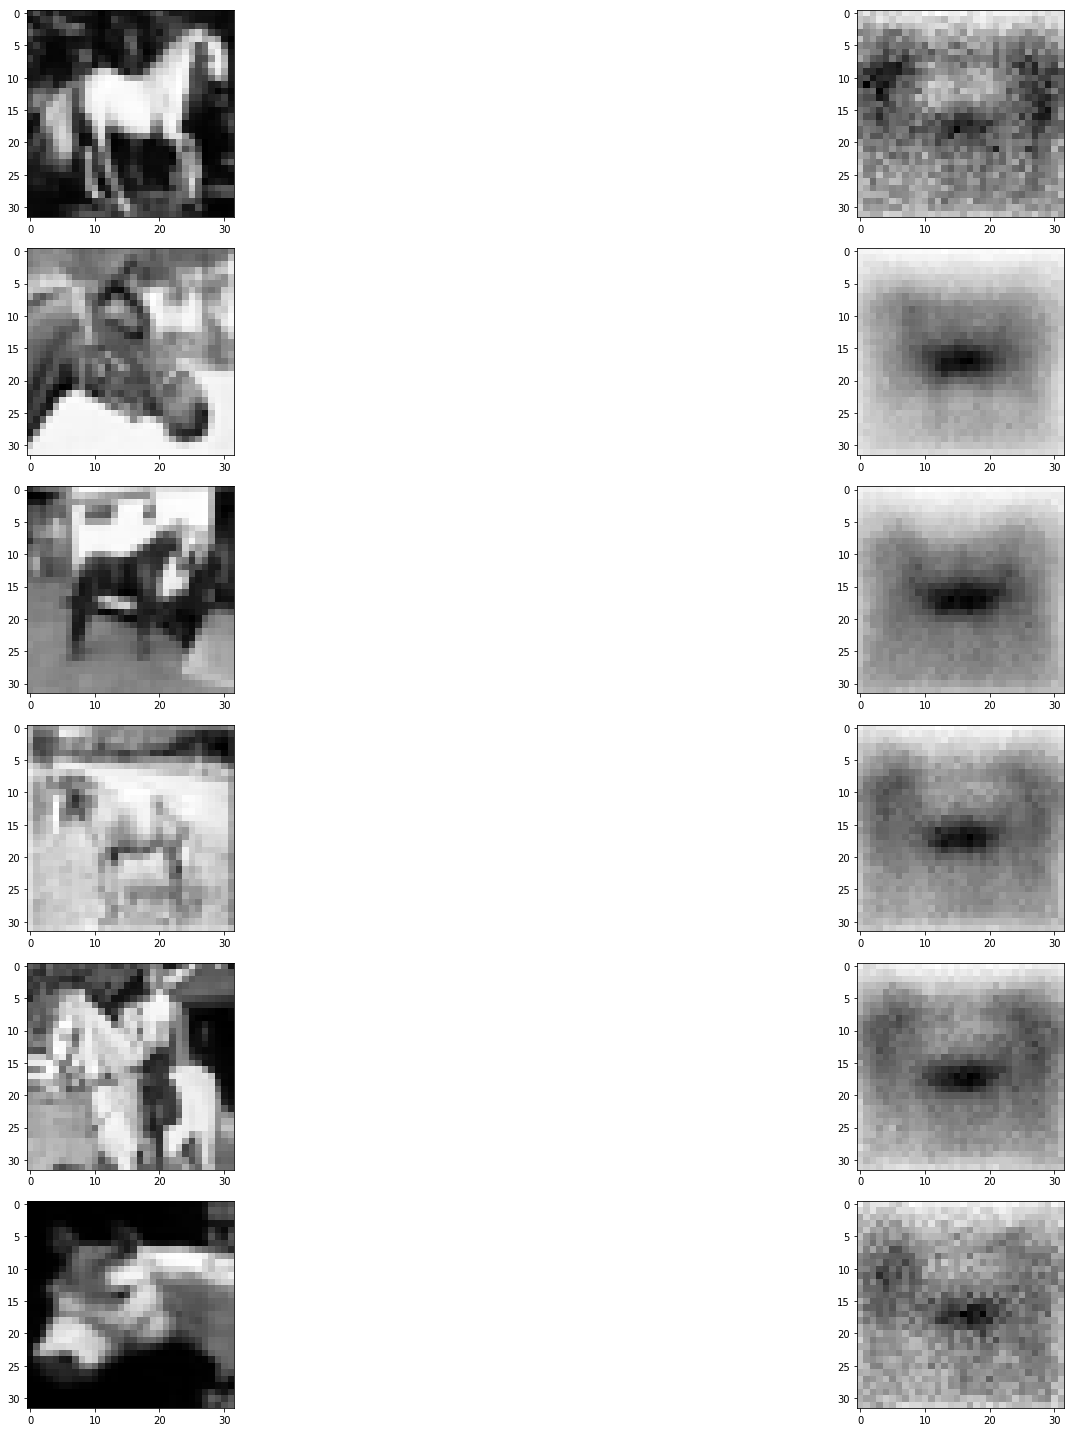

In [3]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(6,2,figsize=(32,20))

for i, row in enumerate(ax):
    tempIm=np.reshape(test_x[test_horse_indices[i],:], (32,32))
    row[0].imshow(tempIm, cmap='Greys_r')

    tempDecode = ae.decode(encoding[test_horse_indices[i],:][None,:])
    row[1].imshow(tempDecode, cmap='Greys_r')

plt.tight_layout()